<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>



# **Ch4 - Notebook : Graphes**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**


![]()
<img src="http://www-igm.univ-mlv.fr/~dr/XPOSE2012/visualisation_de_graphes/images/graphe.png" width="350" height="220"/>

## **À retenir dans ce notebook :**

* **Les différents modes d'implémentation des graphes :**
    * **par matrice d'adjacence**
    * **par un dictionnaire dont les clés sont les noms des sommets et les valeurs la liste de leurs sommets adjacents**
    * **par un dictionnaire dont les clés sont les noms des sommets et les valeurs la liste des dictionnaires de leurs sommets adjacents pondérés**
* **Les algorithmes de base relatifs aux graphes (liste des sommets, liste des voisins d'un sommet, ajout/suppression d'une arête, d'un sommet de de toutes les arêtes qui lui sont asociées, etc.)**

Les aspects graphiques sont hors programme.



## **Visualisation d'un graphe**



### **Visualisation rapide, dans *Wims***

* Entrer la matrice d'adjacence

    Exemple : 

1,1,2 ; 1,0,1 ; 2,1,0

* Entrer la liste des sommets

A,B,C
    
* Précisez les paramètres

* et c'est tout.

In [ ]:
%%html
<iframe src="https://wims.univ-cotedazur.fr/wims/fr_tool~geometry~graphviz.fr.html" width="800" height="500"></iframe>

### **Fonction de visualisation (utilisation du module *Graphviz*)**

Rien dans ce paragraphe n'est exigible.

Inutile en 1<sup>ère</sup> lecture, on pourra essayer de comprendre en 2<sup>ème</sup> lecture

In [ ]:
 def liste_noeuds(gr):
        """Fonction qui reçoit en entrée un graphe gr 
        et renvoie la liste de ses noeuds"""
        nds = list(gr.keys())   # les noeuds sont les clés du dictionnaire
        nds.sort()              # on ordonne la liste des noeuds par ordre alphabétique
        return nds

In [ ]:
def arete(gr,nd1, nd2):
        """Fonction qui reçoit en entrées un graphe gr et deux noeuds nd1 et nd2,
        et qui renvoie le poids de l'arête nd1->nd2 ou 0 si pas d'arête"""
        if nd2 not in voisins(gr, nd1):
            return 0
        for a in gr[nd1]:
            if a[0] == nd2:
                return a[1]

In [ ]:
def voisins(gr, nd):
        """Fonction qui reçoit en entrées un graphe gr et un noeud nd
        et renvoie la liste des noeuds voisins du noeud nd dans le graphe gr"""
        if nd in liste_noeuds(gr):
            return [a[0] for a in gr[nd]]
        else:
            return []

In [ ]:
from graphviz import Digraph # bibliothèque hors programme d'ECG

def show(gr):
        """Fonction qui reçoit en entrée un graphe gr, orienté ou non, pondéré ou non
        modélisé par une liste de couples ou de listes,
        et qui réalise la représentation graphique avec graphviz du graphe gr"""

        dispo="circo" # valeurs possibles "neato", "circo","dot","fdp"

        dot = Digraph(comment="Graphe", engine = dispo, format='svg') #Digraph est le module pour les graphes orientés ('Directed Graph')

        # Attibuts graphiques, pour jouer
        #dot.attr('graph', overlap = 'false', fontsize = '16', bgcolor = "#ffffff00",fontcolor="grey")
        #dot.attr('node', shape = 'circle', fixedsize = 'true', width = '0.4', fontsize = '14', style = "filled", color = 'grey')
        #dot.attr('edge', arrowsize = '0.7', fontsize = '12',color="grey",fontcolor="grey")

        for nd in liste_noeuds(gr):
            dot.node(nd,nd)
            for a in gr[nd]:
                # Teste si l'arête est orientée
                if arete(gr,a[0], nd) == arete(gr, nd, a[0]) :
                    # dessin d'une arête non orientée
                    if a[0]<= nd:
                        # On ne dessine qu'une seule arête sur les 2
                        if a[1] != 1:
                            dot.edge(nd, a[0],label=str(a[1]), dir="none")
                        else:
                            dot.edge(nd, a[0], dir="none")
                else:
                    # dessin d'une arête orientée
                    if a[1] != 1:
                        dot.edge(nd, a[0],label=str(a[1]))
                    else:
                        dot.edge(nd, a[0])
        return dot

## **diverses natures de graphes et implémentations**



### **graphe non orienté, non pondéré**

Ici, le graphe est implémenté par un **dictionnaire**, dont les **clés** sont les noms des sommets, et les **valeurs** la liste de sommets adjacents, eux-mêmes présentés comme une liste groupant le nom du sommet adjacent et la valeur de l'arête entre ces deux sommets.

C'est ce que l'on appelle un type... **"complexe"** (...pour le moins...) ou **"construit"**

In [ ]:
graphe =    {'A': [['B', 1], ['C', 1],['D',1]],             
            'B': [['A', 1], ['C', 1]], 
            'C': [['A', 1], ['B', 1], ['D', 1]],
            'D': [['A',1],['C', 1]] }
            
graphe

{'A': [['B', 1], ['C', 1], ['D', 1]],
 'B': [['A', 1], ['C', 1]],
 'C': [['A', 1], ['B', 1], ['D', 1]],
 'D': [['A', 1], ['C', 1]]}

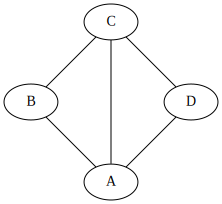

In [ ]:
show(graphe)

remarque : 
* lorsque le graphe est non pondéré (ou lorsque le poids d'une arête est de 1), rien n'est indiqué sur l'arête par notre fonction *show*
* lorsque une arête est non orientée (en fait quand une arête relie un noeud à un autre et que l'arête réciproque existe aussi, elle est représentée par notre fonction *show* par un segment sans flèche.

### **graphe non orienté, pondéré**

In [ ]:
graphe =    {'A': [['B', 2], ['C', 4],['D',7]],             
            'B': [['A', 2], ['C', 1]], 
            'C': [['A', 4], ['B', 1], ['D', 3]],
            'D': [['A',7],['C', 3]] }
            
graphe

{'A': [['B', 2], ['C', 4], ['D', 7]],
 'B': [['A', 2], ['C', 1]],
 'C': [['A', 4], ['B', 1], ['D', 3]],
 'D': [['A', 7], ['C', 3]]}

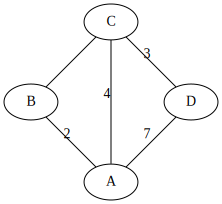

In [ ]:
show(graphe)

### **graphe orienté, non pondéré**

In [ ]:
graphe =    {'A': [['B', 1], ['C', 1],['D',1]],             
            'B': [['A', 1], ['C', 1]], 
            'C': [['B', 1], ['D', 1]] }
            
graphe

{'A': [['B', 1], ['C', 1], ['D', 1]],
 'B': [['A', 1], ['C', 1]],
 'C': [['B', 1], ['D', 1]]}

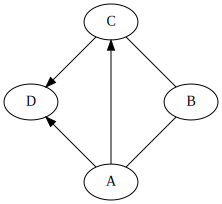

In [ ]:
show(graphe)

source : https://notebooks.lecluse.fr/python/nsi/terminale/graphes/algorithmique/poo/tp/2020/08/17/nsi_t_algo_graphes.html

## **Actions de base sur les graphes**

In [ ]:
graphe =    {'A': [['M', 65], ['R', 90], ['T', 80]],            
            'L': [['P', 230], ['T', 260]],
            'M': [['A', 65], ['P', 95], ['R', 90], ['T', 55]],
            'P': [['L', 230], ['M', 95], ['T', 130]],
            'R': [['A', 90], ['M', 90]],
            'T': [['A', 80], ['L', 260], ['M', 55], ['P', 130]]}
                

**Note** : les valeurs de ce dictionnaire sont des listes de listes. Dans le programme officiel, les listes sont utilisées uniquement pour représenter des tableaux à une dimension, SAUF dans ce cas de la modélisation d'un graphe par un dictionnaire dont les valeurs sont des listes de listes.

In [ ]:
graphe

{'A': [['M', 65], ['R', 90], ['T', 80]],
 'L': [['P', 230], ['T', 260]],
 'M': [['A', 65], ['P', 95], ['R', 90], ['T', 55]],
 'P': [['L', 230], ['M', 95], ['T', 130]],
 'R': [['A', 90], ['M', 90]],
 'T': [['A', 80], ['L', 260], ['M', 55], ['P', 130]]}

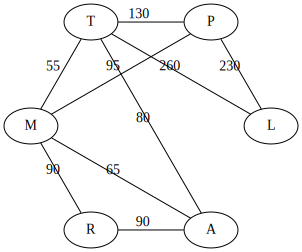

In [ ]:
show(graphe)



### **Ajouter un noeud**

In [ ]:
def ajouter_noeud(gr, nd):
        """Fonction qui reçoit un graphe gr et un noeud nd
        et qui ajoute le nouveau noeud nd au graphe gr"""
        
        if not nd in gr.keys():
            gr[nd] = []

In [ ]:
ajouter_noeud(graphe,'G')

In [ ]:
graphe

{'A': [['M', 65], ['R', 90], ['T', 80]],
 'G': [],
 'L': [['P', 230], ['T', 260]],
 'M': [['A', 65], ['P', 95], ['R', 90], ['T', 55]],
 'P': [['L', 230], ['M', 95], ['T', 130]],
 'R': [['A', 90], ['M', 90]],
 'T': [['A', 80], ['L', 260], ['M', 55], ['P', 130]]}

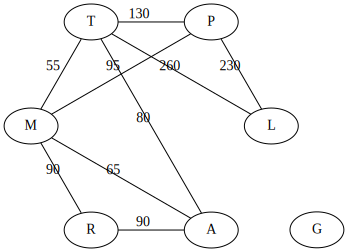

In [ ]:
show(graphe)

### **Obtenir la liste des noeuds**

In [ ]:
 def liste_noeuds(gr):
        """Fonction qui reçoit en entrée un graphe gr 
        et renvoie la liste de ses noeuds"""
        nds = list(gr.keys())   # les noeuds sont les clés du dictionnaire
        nds.sort()              # on ordonne la liste des noeuds par ordre alphabétique
        return nds

In [ ]:
liste_noeuds(graphe)

['A', 'G', 'L', 'M', 'P', 'R', 'T']

### **Liste des voisins d'un noeud donné**

In [ ]:
 def voisins(gr, nd):
        """Fonction qui reçoit en entrées un graphe gr et un noeud nd
        et renvoie la liste des noeuds voisins du noeud nd dans le graphe gr"""
        if nd in liste_noeuds(gr):
            return [a[0] for a in gr[nd]]
        else:
            return []

In [ ]:
voisins(graphe,'T')

['A', 'L', 'M', 'P']

### **Ajouter une arête ou un arc entre deux noeuds existants**

In [ ]:
def ajouter_arete(gr, nd1, nd2, poids=1):
        """Fonction qui reçoit en entrée un graphe gr et deux noeuds nd1 et nd2, ainsi qu'un poids (par défaut 1)
        et qui ajoute l'arête [nd1,nd2] au graphe gr
        si poids n'est pas renseigné, il prendra la valeur 1"""
        # On s'assure que les sommets existent
        ajouter_noeud(gr,nd1)
        ajouter_noeud(gr,nd2)
        # On crée la connexion nd1 -> nd2
        if nd2 not in voisins(gr,nd1):
             gr[nd1].append([nd2, poids])

In [ ]:
ajouter_arete(graphe,'G','L',70)

In [ ]:
graphe

{'A': [['M', 65], ['R', 90], ['T', 80]],
 'G': [['L', 70]],
 'L': [['P', 230], ['T', 260]],
 'M': [['A', 65], ['P', 95], ['R', 90], ['T', 55]],
 'P': [['L', 230], ['M', 95], ['T', 130]],
 'R': [['A', 90], ['M', 90]],
 'T': [['A', 80], ['L', 260], ['M', 55], ['P', 130]]}

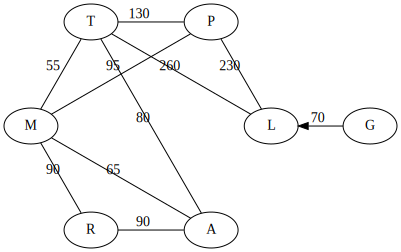

In [ ]:
show(graphe)

### **Obtenir le poids d'une arête dans un graphe valué (pondéré)**

In [ ]:
 def arete(gr,nd1, nd2):
        """Fonction qui reçoit en entrées un graphe gr et deux noeuds nd1 et nd2,
        et qui renvoie le poids de l'arête nd1->nd2 ou 0 si pas d'arête"""
        if nd2 not in voisins(gr, nd1):
            return 0
        for a in gr[nd1]:
            if a[0] == nd2:
                return a[1]
    

In [ ]:
arete(graphe,'T','L')

260

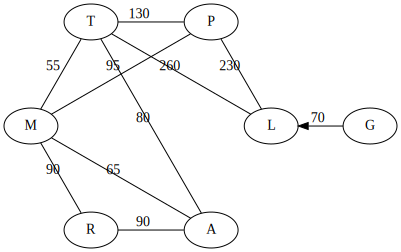

In [ ]:
from graphviz import Digraph
show(graphe)

### **Supprimer une arête**

In [ ]:
def supprime_arete(gr,nd1,nd2) :
    ''' Fonction qui supprime du graphe gr l'arête orientée reliant nd1 à nd2, si elle existait.
        Si l'arête existait et était non orientée, ses deux instances sont supprimées du dictionnaire gr'''
    if nd2 in voisins(gr,nd1) :
        r1 = voisins(gr,nd1).index(nd2)        
        if nd1 in voisins(gr,nd2) :
            r2 = voisins(gr,nd2).index(nd1)
            if arete(gr,nd2,nd1) == arete(gr,nd1,nd2): #arête non orientée
                gr[nd2].pop(r2)
        gr[nd1].pop(r1)

In [ ]:
supprime_arete(graphe,"T","L")


In [ ]:
graphe

{'A': [['M', 65], ['R', 90], ['T', 80]],
 'G': [['L', 70]],
 'L': [['P', 230]],
 'M': [['A', 65], ['P', 95], ['R', 90], ['T', 55]],
 'P': [['L', 230], ['M', 95], ['T', 130]],
 'R': [['A', 90], ['M', 90]],
 'T': [['A', 80], ['M', 55], ['P', 130]]}

### **Supprimer un noeud et toutes les arêtes qui le concernent**

In [ ]:
def supprime_noeud(gr,nd):
    '''Fonction qui supprime le noeud nd du graphe gr'''

    if nd in liste_noeuds(gr):
        for s in voisins(gr,nd):
            supprime_arete(gr,s, nd)
        l=[s for s in gr[nd]] # car on ne peut pas parcourir une liste qu'on modifie
        for s in l:
            supprime_arete(gr,nd,s)
                   
        
        del gr[nd]

In [ ]:
supprime_noeud(graphe,"T")
graphe

{'A': [['M', 65], ['R', 90]],
 'G': [['L', 70]],
 'L': [['P', 230]],
 'M': [['A', 65], ['P', 95], ['R', 90]],
 'P': [['L', 230], ['M', 95]],
 'R': [['A', 90], ['M', 90]]}

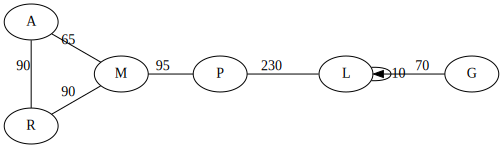

In [ ]:
ajouter_arete(graphe,"L","L",10)
show(graphe)

In [ ]:
graphe

{'A': [['M', 65], ['R', 90]],
 'G': [['L', 70]],
 'L': [['P', 230], ['L', 10]],
 'M': [['A', 65], ['P', 95], ['R', 90]],
 'P': [['L', 230], ['M', 95]],
 'R': [['A', 90], ['M', 90]]}

## **Implémentation d'un graphe par une matrice et passage d'une implémentation à une autre**

### **Passer de la matrice d'adjacences d'un graphe, au dictionnaire d'adjacences**

In [ ]:
def importe_matrice(matrice, noms):
        """Fonction qui reçoit une matrice d'adjacence(liste de listes), et la liste des noms des sommets, 
        et renvoie le dictionnaire d'adjacence gr"""
        
        longueur = len(matrice)
        gr = {}
        for i in range(longueur): 
            ajouter_noeud(gr,noms[i])           
            
            for j in range(longueur):
                if matrice[i][j] != 0:
                    ajouter_arete(gr, noms[i], noms[j], matrice[i][j])
                    
        return gr

In [ ]:
matrice = [[0,1,1,0,0,0,0,0],
          [1,0,0,1,1,0,0,0],
          [1,0,0,1,0,0,0,0],
          [0,1,1,0,1,0,0,0],
          [0,1,0,1,0,1,1,0],
          [0,0,0,0,1,0,1,0],
          [0,0,0,0,1,1,0,1],
          [0,0,0,0,0,0,1,0]]

graphe2 = importe_matrice(matrice, ["A", "B", "C", "D", "E", "F", "G", "H"])
graphe2

{'A': [['B', 1], ['C', 1]],
 'B': [['A', 1], ['D', 1], ['E', 1]],
 'C': [['A', 1], ['D', 1]],
 'D': [['B', 1], ['C', 1], ['E', 1]],
 'E': [['B', 1], ['D', 1], ['F', 1], ['G', 1]],
 'F': [['E', 1], ['G', 1]],
 'G': [['E', 1], ['F', 1], ['H', 1]],
 'H': [['G', 1]]}

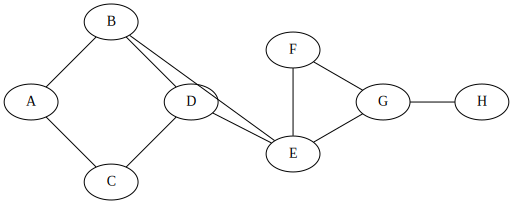

In [ ]:
show(graphe2)

### **Passer du dictionnaire d'adjacences d'un graphe à sa matrice d'adjacences**

In [ ]:
def exporte_matrice(gr):
    '''Fonction qui reçoit un graphe gr 
    et renvoie sa matrice d'adjacences au format liste de listes'''

    noms = liste_noeuds(gr)
    longueur = len(noms)
    M = [[0 for j in range(longueur)]for i in range(longueur)]
    for i in range(longueur):
        for j in range(longueur):
            if noms[j] in voisins(gr,noms[i]):
                M[i][j] = arete(gr,noms[i],noms[j])
    return M


In [ ]:
mat_graphe = exporte_matrice(graphe)
mat_graphe

[[0, 0, 0, 65, 0, 90],
 [0, 0, 70, 0, 0, 0],
 [0, 0, 10, 0, 230, 0],
 [65, 0, 0, 0, 95, 90],
 [0, 0, 230, 95, 0, 0],
 [90, 0, 0, 90, 0, 0]]